***                                              
# Data Science Project (Fall 2019) 

## Analyzing Offenses using CCTV Cameras

### Aishwarya Murumkar (VH51130)
### Vandana Venkiteswaran (JZ79730)
***

#### PROJECT STATEMENT & GOAL

The projects aims to identify whether arrests in Baltimore are more in areas which have cameras. To identify whether the CCTV Cameras are being used efficiently and to determine whether there in need of Cameras in other locations where arrests/crime is more. The datasets for this are taken from Open Baltimore. Two datasets that are being used are CCTV Locations and BPD Arrests. 

#### HOW WE INTEND TO ACHIEVE THE GOAL, OUR APPROACH

CCTV Locations dataset has columns: CameraName,Latitude,Longitude,ZipCode,Neighborhood
BPD Arrest dataset has columns: ArrestLocation,IncidentOffense,IncidentLocation,District,Neighborhood,Longitude,Latitude

Both datasets have location information that we intend to use to determine the efficiency of cctv cameras with respect to arrests

#### WHY DID WE DO IT

Baltimore being ranked among the top 3 dangerous states in United States we picked this topic. We intend to analyze the data present since 2014 till now to understand the types of incidents (crime) , time and locations and also to analyze the reasons. We aim to integrate CCTV locations with the Arrest data to analyze the same.

#### OTHER VISUALIZATIONS

Apart from this we intend to do visualizations specific to the type of arrests and the incident location.
Number of incidents based on the time of the day.
Is a particular area specific to some common kind of charge like vehicles are stolen usually in southern districts. 

### About datasets : 

BPD Arrest : The data represnts the top arrests charge of those processed at Baltimore central booking and intake facility. 

CCTV Locations : The dataset contains the closed circuit camera locations capturing activity within 256ft (~2 blocks)

### Abstract / Accomplishments 

We started off from cleaning the data sets and then we were successfully able to map the data of Arrests and CCTV locations together. We did visulazations that describe how different age, race and district afftect offense data. We were then able to geographically plot the crime locations and cctv locations to determine the areas where cameras are needed and where there is no need of more cameras. We see that in the central part of the city where the cameras are located more densely result in more arrest which signify that cameras are successfully helping in detecting ofense. We see that outer areas have less cameras which result in less number of arrests. 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
from sklearn.cluster import KMeans 

In [2]:
dfArrests = pd.read_csv("C:/Users/Aishwarya/Downloads/BPD_Arrests (1).csv")
dfArrests.head()

C:\Users\Aishwarya\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Arrest,Age,Sex,Race,ArrestDate,ArrestTime,ArrestLocation,IncidentOffense,IncidentLocation,Charge,ChargeDescription,District,Post,Neighborhood,Longitude,Latitude,Location 1
0,NaN,29.0,M,B,02/28/2019,9:20,NaN,Unknown Offense,NaN,NaN,Unknown Charge,NaN,NaN,NaN,NaN,NaN,NaN
1,19029683.0,36.0,M,B,02/27/2019,12:10,200 EDEN ST,Unknown Offense,200 EDEN ST,1 1111,CDS PWID,Southeast,212,NaN,-76.598568971120,39.2888,NaN
2,19094289.0,45.0,F,B,06/28/2019,10:43,NaN,Unknown Offense,NaN,1 1420,ASSAULT-FIRST DEGREE,NaN,NaN,NaN,NaN,NaN,NaN
3,19093811.0,39.0,M,B,06/27/2019,11:34,NaN,Unknown Offense,NaN,NaN,TEMP FED DETAINEE,NaN,NaN,NaN,NaN,NaN,NaN
4,19028506.0,45.0,M,B,02/25/2019,13:35,NaN,Unknown Offense,NaN,1 0077,FAILURE TO APPEAR,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
dfArrests.describe

<bound method NDFrame.describe of             Arrest   Age Sex Race  ArrestDate ArrestTime  \
0              NaN  29.0   M    B  02/28/2019       9:20   
1       19029683.0  36.0   M    B  02/27/2019      12:10   
2       19094289.0  45.0   F    B  06/28/2019      10:43   
3       19093811.0  39.0   M    B  06/27/2019      11:34   
4       19028506.0  45.0   M    B  02/25/2019      13:35   
5              NaN  39.0   M    U  06/25/2019      09:50   
6       19027327.0  33.0   M    B  02/22/2019      18:30   
7              NaN  51.0   M    W  02/19/2019      14:00   
8       19023663.0  24.0   F    B  02/14/2019      12:00   
9              NaN  33.0   M    B  02/13/2019      11:00   
10      19022601.0  42.0   M    W  02/13/2019       7:50   
11      19085444.0  43.0   M    B  06/11/2019      12:30   
12      19084818.0  56.0   M    B  06/10/2019      16:30   
13      19083976.0  23.0   M    B  06/09/2019      21:19   
14             NaN  22.0   M    B  02/09/2019      14:17   
15    

In [4]:
dfArrests.shape

(151469, 17)

In [5]:
dfArrests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151469 entries, 0 to 151468
Data columns (total 17 columns):
Arrest               144234 non-null float64
Age                  151429 non-null float64
Sex                  151469 non-null object
Race                 151469 non-null object
ArrestDate           151469 non-null object
ArrestTime           151469 non-null object
ArrestLocation       81209 non-null object
IncidentOffense      151469 non-null object
IncidentLocation     81209 non-null object
Charge               134335 non-null object
ChargeDescription    151469 non-null object
District             81687 non-null object
Post                 80344 non-null object
Neighborhood         0 non-null float64
Longitude            79892 non-null object
Latitude             79892 non-null object
Location 1           0 non-null float64
dtypes: float64(4), object(13)
memory usage: 19.6+ MB


### Using heatmap below , we find out the null values in the BPD_Arrests dataframe

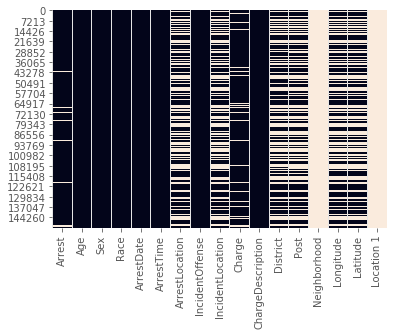

In [6]:
sns.heatmap(dfArrests.isnull(), cbar=False)

#### Since Neighborhood and Location 1 column has we will drop those columns.

In [7]:
dfArrests.drop(['Neighborhood','Location 1'], axis = 1)

,Arrest,Age,Sex,Race,ArrestDate,ArrestTime,ArrestLocation,IncidentOffense,IncidentLocation,Charge,ChargeDescription,District,Post,Longitude,Latitude
0,NaN,29.0,M,B,02/28/2019,9:20,NaN,Unknown Offense,NaN,NaN,Unknown Charge,NaN,NaN,NaN,NaN
1,19029683.0,36.0,M,B,02/27/2019,12:10,200 EDEN ST,Unknown Offense,200 EDEN ST,1 1111,CDS PWID,Southeast,212,-76.598568971120,39.2888
2,19094289.0,45.0,F,B,06/28/2019,10:43,NaN,Unknown Offense,NaN,1 1420,ASSAULT-FIRST DEGREE,NaN,NaN,NaN,NaN
3,19093811.0,39.0,M,B,06/27/2019,11:34,NaN,Unknown Offense,NaN,NaN,TEMP FED DETAINEE,NaN,NaN,NaN,NaN
4,19028506.0,45.0,M,B,02/25/2019,13:35,NaN,Unknown Offense,NaN,1 0077,FAILURE TO APPEAR,NaN,NaN,NaN,NaN
5,NaN,39.0,M,U,06/25/2019,09:50,NaN,Unknown Offense,NaN,NaN,Unknown Charge,NaN,NaN,NaN,NaN
6,19027327.0,33.0,M,B,02/22/2019,18:30,NaN,Unknown Offense,NaN,1 0077,FAILURE TO APPEAR,NaN,NaN,NaN,NaN
7,NaN,51.0,M,W,02/19/2019,14:00,NaN,Unknown Offense,NaN,NaN,Unknown Charge,NaN,NaN,NaN,NaN
8,19023663.0,24.0,F,B,02/14/2019,12:00,NaN,Unknown Offense,NaN,1 0077,FAILURE TO APPEAR,NaN,NaN,NaN,NaN
9,NaN,33.0,M,B,02/13/2019,11:00,NaN,Unknown Offense,NaN,NaN,Unknown Charge,NaN,NaN,NaN,NaN


### Considering only the valid districts in the dataset and counting each

In [8]:
values='Southern','Western','Eastern','Northern','Northwest','Southwest','Central','Northeast','Southeast',' ' 

#pd.Index(np.where(dfArrests['District'].isin(values))[0])
df_NotNeededDistricts =pd.Index(np.where(~dfArrests['District'].isin(values))[0])
#dfArrests.drop(pd.Index(np.where(~dfArrests['District'].isin(values))[0]), inplace = True)
#dfArrests.District.value_counts()
dfArrests.drop(df_NotNeededDistricts, inplace = True)
dfArrests['District'].value_counts()

Southern     10473
Western      10167
Southeast    10151
Eastern       9961
Northeast     9609
Central       8546
Southwest     8403
Northwest     6547
Northern      5664
Name: District, dtype: int64

In [ ]:
#dfArrests.Latitude.isna().sum()

In [ ]:
#dfArrests.Longitude.isna().sum()

In [9]:
#dfArrests['Latitude'].isnull().sum()

0

In [ ]:
#dfArrests['Latitude'].count()

#### Converting lattitude and longitude into float to plot the geolocation

In [17]:
dfArrests['Latitude'].convert_objects(convert_numeric=True)

C:\Users\Aishwarya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


1         39.288795
65        39.306743
73        39.273895
87        39.352632
90        39.297952
92        39.306991
94        39.354671
96        39.295367
97        39.338759
99        39.285784
102       39.355654
106       39.348436
108       39.345529
109       39.306655
112       39.283130
113       39.301370
115       39.293629
116       39.344528
121       39.309499
124       39.364162
136       39.288296
137       39.232052
141       39.290198
143       39.293476
144       39.293060
145       39.228362
148       39.296603
149       39.287691
150       39.281181
151       39.282892
            ...    
151432    39.284892
151434    39.286237
151435    39.290672
151436    39.323201
151437    39.276609
151438    39.267029
151439    39.285741
151441    39.277008
151443    39.295837
151444    39.284892
151445    39.317270
151446    39.301327
151447    39.282453
151448    39.290672
151452    39.309830
151453    39.285741
151454    39.283002
151455    39.328294
151456    39.267029


In [18]:
dfArrests['Longitude'].convert_objects(convert_numeric=True)

C:\Users\Aishwarya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


1        -76.598569
65       -76.644866
73       -76.537788
87       -76.678313
90       -76.680036
92       -76.593842
94       -76.609638
96       -76.567768
97       -76.684763
99       -76.649993
102      -76.609926
106      -76.674909
108      -76.567170
109      -76.556270
112      -76.645955
113      -76.646918
115      -76.615460
116      -76.570363
121      -76.641868
124      -76.609915
136      -76.623670
137      -76.602439
141      -76.594165
143      -76.574086
144      -76.698192
145      -76.587575
148      -76.642907
149      -76.565391
150      -76.708302
151      -76.649817
            ...    
151432   -76.671485
151434   -76.620926
151435   -76.628502
151436   -76.549080
151437   -76.616562
151438   -76.631503
151439   -76.635157
151441   -76.612371
151443   -76.571267
151444   -76.671485
151445   -76.646706
151446   -76.640295
151447   -76.593720
151448   -76.628502
151452   -76.602962
151453   -76.635157
151454   -76.602774
151455   -76.608132
151456   -76.631503


#### Lattitude and Longitude has been channged to float to map it our graph

In [19]:
dfArrests['Longitude']=pd.to_numeric(dfArrests['Longitude'], downcast='float')
dfArrests['Latitude']=pd.to_numeric(dfArrests['Latitude'], downcast='float')

In [20]:
dfArrests['Longitude'].describe()

count    79521.000000
mean       -76.585732
std          0.073903
min        -77.000000
25%        -76.647583
50%        -76.617287
75%        -76.588379
max        -76.529762
Name: Longitude, dtype: float64

In [21]:
dfArrests['Latitude'].describe()

count    79521.000000
mean        39.276447
std          0.052266
min         39.000000
25%         39.287674
50%         39.300850
75%         39.316990
max         39.371975
Name: Latitude, dtype: float64

#### Extracting the Timestamp Details

In [22]:
#dfArrests['ArrestYear'] =dfArrests.ArrestDate.map(lambda x: datetime.strptime(x,'%m/%d/%Y').year)
#dfArrests['ArrestYear']
#dfArrests['ArrestMonth'] =dfArrests.ArrestDate.map(lambda x: datetime.strptime(x, '%m/%d/%Y').month)
#dfArrests['DayofWeeknumber'] = dfArrests.ArrestDate.map(lambda x: datetime.strptime(x, '%m/%d/%Y').day)

#df['Weekday_Name'] = dfArrests['ArrestDate'].apply(lambda x: dt.datetime.strftime(x, '%A').weekday_name)
dfArrests['ArrestDate'] = pd.to_datetime(dfArrests['ArrestDate'])
dfArrests['DayofWeeknumber'] = dfArrests['ArrestDate'].dt.dayofweek
dfArrests['DayOfWeek']       = dfArrests['ArrestDate'].dt.weekday_name
dfArrests['MonthDayNum']     = dfArrests['ArrestDate'].dt.day
dfArrests['Month']           = dfArrests['ArrestDate'].dt.month
dfArrests['Year']            = dfArrests['ArrestDate'].dt.year

In [23]:
dfArrests.columns

Index(['Arrest', 'Age', 'Sex', 'Race', 'ArrestDate', 'ArrestTime',
       'ArrestLocation', 'IncidentOffense', 'IncidentLocation', 'Charge',
       'ChargeDescription', 'District', 'Post', 'Neighborhood', 'Longitude',
       'Latitude', 'Location 1', 'OrgLatitude', 'OrgLongitude', 'BPA_LatMatch',
       'BPA_LongMatch', 'DayofWeeknumber', 'DayOfWeek', 'MonthDayNum', 'Month',
       'Year'],
      dtype='object')

#### Extracting data - Day Wise

In [24]:
data_Weekday= dfArrests['DayOfWeek'].value_counts()
data_Weekday

Wednesday    13248
Tuesday      13029
Thursday     13014
Friday       11886
Monday       10726
Saturday      9522
Sunday        8096
Name: DayOfWeek, dtype: int64

The dataset contains the closed circuit camera locations capturing activity within 256ft (~2 blocks)

In [25]:
dfCCTV = pd.read_csv('C:/Users/Aishwarya/Downloads/CCTV_Locations (2).csv')

The dataset contains the top arrest charge of those processed at Baltimore's Central Booking & Intake Facility. It does not contain those who have been processed through Juvenile Booking.

Doing head and tail on CCTV Locations to have a glance on data

In [26]:
dfCCTV.head()

,ID,CameraName,Owner,RegistrationType,ListedDate,Latitude,Longitude,ZipCode,Neighborhood,PoliceDistrict,CouncilDistrict,PolicePost,Location,2010 Census Neighborhoods,2010 Census Wards Precincts,Zip Codes
0,277,733 North Ave West - Etting/Whitelock,BPD - North Ave West,Business,10/22/2014 05:27:48 PM,39.310861,-76.640704,21217.0,Penn North,Western,7,733,POINT (39.310861 -76.640704),NaN,NaN,NaN
1,71,70 Downtown - Saratoga/Lexington,BPD - Downtown,Business,10/22/2014 05:27:45 PM,39.291378,-76.607830,21202.0,Downtown,Central,11,111,POINT (39.291378 -76.60783),NaN,NaN,NaN
2,376,1018 Tri-District - Monroe/Ramsay,BPD - Tri-District,Business,10/22/2014 05:27:49 PM,39.283147,-76.646666,21223.0,Carrollton Ridge,Southern,9,934,POINT (39.283147 -76.646666),NaN,NaN,NaN
3,142,331 Cherry Hill - Rear of 3411 Round Rd,BPD - Cherry Hill,Business,10/22/2014 05:27:46 PM,39.244008,-76.624244,21225.0,Cherry Hill,Southern,10,922,POINT (39.244008 -76.624244),NaN,NaN,NaN
4,104,221 Broadway - Fleet/Broadway (Eastside),BPD - Broadway,Business,10/22/2014 05:27:46 PM,39.284564,-76.593260,21231.0,Fells Point,Southeastern,1,213,POINT (39.284564 -76.59326),NaN,NaN,NaN


In [27]:
dfCCTV.tail()

,ID,CameraName,Owner,RegistrationType,ListedDate,Latitude,Longitude,ZipCode,Neighborhood,PoliceDistrict,CouncilDistrict,PolicePost,Location,2010 Census Neighborhoods,2010 Census Wards Precincts,Zip Codes
609,518,2106 Gilmore - 1679 Bakbury Ct,BPD - Gilmore,Business,10/22/2014 05:27:50 PM,39.307862,-76.645106,21217.0,Sandtown-Winchester,Western,7,742,POINT (39.307862 -76.645106),NaN,NaN,NaN
610,473,1962 Avenue Market - Avenue Market Middle,BPD - Avenue Market,Business,10/22/2014 05:27:50 PM,39.303537,-76.635647,21217.0,Upton,Central,11,123,POINT (39.303537 -76.635647),NaN,NaN,NaN
611,375,1017 Tri-District - Monroe/Wilhelm,BPD - Tri-District,Business,10/22/2014 05:27:49 PM,39.283694,-76.646686,21223.0,Carrollton Ridge,Southern,9,934,POINT (39.283694 -76.646686),NaN,NaN,NaN
612,239,624 Monument - Mcelderry/Robinson,BPD - Monument,Business,10/22/2014 05:27:47 PM,39.298041,-76.573087,21205.0,Ellwood Park/Monument,Southeastern,13,224,POINT (39.298041 -76.573087),NaN,NaN,NaN
613,103,220 Broadway - Fleet/Broadway,BPD - Broadway,Business,10/22/2014 05:27:46 PM,39.284604,-76.593566,21231.0,Fells Point,Southeastern,1,213,POINT (39.284604 -76.593566),NaN,NaN,NaN


After doing head and tail few observations that we could make from the dataset are: few columns such as 2010 Census Neighborhoods have no values and could be dropped, ZipCode can be converted to an integer from float type, There are two columns for ZipCode and one contains no values whoch could be dropped

To make sure there is no duplicate data 

In [28]:
len(dfCCTV) - len(dfCCTV.drop_duplicates())

0

#### The seaborn graph for CCTV dataset 

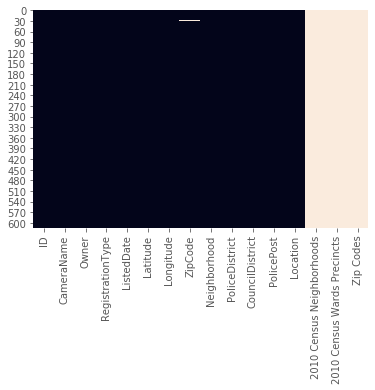

In [29]:
sns.heatmap(dfCCTV.isnull(), cbar=False)

To make sure that columns '2010 Census Neighborhoods', '2010 Census Wards Precincts' and 'Zip Codes' have no data and can be dropped

In [30]:
dfCCTV['2010 Census Neighborhoods'].value_counts()

Series([], Name: 2010 Census Neighborhoods, dtype: int64)

In [31]:
dfCCTV['2010 Census Wards Precincts'].value_counts()

Series([], Name: 2010 Census Wards Precincts, dtype: int64)

In [32]:
dfCCTV['Zip Codes'].value_counts()

Series([], Name: Zip Codes, dtype: int64)

In [33]:
dfCCTV = dfCCTV.drop(columns=['2010 Census Neighborhoods','2010 Census Wards Precincts','Zip Codes'])

To determine the columns which contain Nan/ NULL values

In [34]:
null_columns=dfCCTV.columns[dfCCTV.isnull().any()]
print(null_columns)

Index(['ZipCode'], dtype='object')


Dropping data that has null values

In [35]:
dfCCTV.dropna(inplace=True)

In [36]:
null_columns=dfCCTV.columns[dfCCTV.isnull().any()]
print(null_columns)

Index([], dtype='object')


Verifying if we can convert ZipCode to integer and if there are any outliers

In [37]:
dfCCTV[dfCCTV['ZipCode'].notnull() & (round(dfCCTV.ZipCode) - dfCCTV.ZipCode != 0.0)]

,ID,CameraName,Owner,RegistrationType,ListedDate,Latitude,Longitude,ZipCode,Neighborhood,PoliceDistrict,CouncilDistrict,PolicePost,Location


Converting ZipCode to integer from float

In [38]:
dfCCTV['ZipCode'] = dfCCTV.ZipCode.astype(int)

The plot shows the number of cameras situated at various locations according to the zipcode

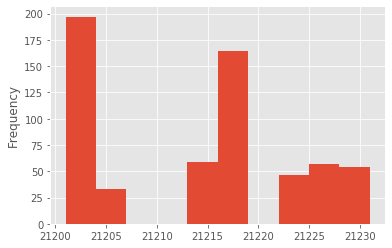

In [39]:
dfCCTV['ZipCode'].plot.hist()

The pie chart shows the cameras at various police districts. It can be seen that the eastern, southern and central police districts have more number of cameras`m

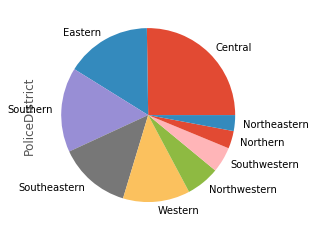

In [40]:
dfCCTV['PoliceDistrict'].value_counts().plot.pie()

The below scatter plot describes the positions of various cameras according to the longitude and latitude infromation. 

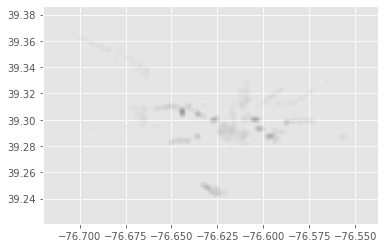

In [41]:
plt.scatter(dfCCTV.Longitude, dfCCTV.Latitude, alpha=0.01, edgecolor='none', c='k');

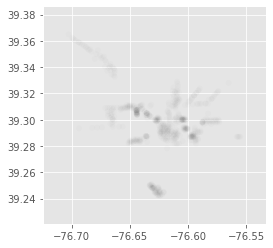

In [42]:
plt.figure(figsize=(4,4))
plt.scatter(dfCCTV.Longitude, dfCCTV.Latitude, alpha=0.01, edgecolor='none', c='k');

Both the above scatter plots are not visually descriptive as we thought they would 

### Merging the datasets

In [111]:
dfArrests.to_csv(r'newDfarrests.csv')
dfArrests1 = pd.read_csv("newDfarrests.csv")

In [112]:
dfArrests['BPA_LatMatch'] = dfArrests1['Latitude'].isin(dfCCTV['Latitude'])
dfArrests['BPA_LatMatch'].value_counts()

False    36202
True       272
Name: BPA_LatMatch, dtype: int64

In [113]:
dfArrests['BPA_LongMatch'] = dfArrests1['Longitude'].isin(dfCCTV['Longitude'])
dfArrests['BPA_LongMatch'].value_counts()

False    36318
True       156
Name: BPA_LongMatch, dtype: int64

In [114]:
dfCCTV['CCTVLatitude']= dfCCTV['Latitude'].round(3)
dfCCTV['CCTVLongitude']=dfCCTV['Longitude'].round(3)
dfCCTV.head()

,ID,CameraName,Owner,RegistrationType,ListedDate,Latitude,Longitude,ZipCode,Neighborhood,PoliceDistrict,CouncilDistrict,PolicePost,Location,CCTVLatitude,CCTVLongitude,geometry
0,277,733 North Ave West - Etting/Whitelock,BPD - North Ave West,Business,10/22/2014 05:27:48 PM,39.310861,-76.640704,21217,Penn North,Western,7,733,POINT (39.310861 -76.640704),39.311,-76.641,POINT (-76.64070 39.31086)
1,71,70 Downtown - Saratoga/Lexington,BPD - Downtown,Business,10/22/2014 05:27:45 PM,39.291378,-76.607830,21202,Downtown,Central,11,111,POINT (39.291378 -76.60783),39.291,-76.608,POINT (-76.60783 39.29138)
2,376,1018 Tri-District - Monroe/Ramsay,BPD - Tri-District,Business,10/22/2014 05:27:49 PM,39.283147,-76.646666,21223,Carrollton Ridge,Southern,9,934,POINT (39.283147 -76.646666),39.283,-76.647,POINT (-76.64667 39.28315)
3,142,331 Cherry Hill - Rear of 3411 Round Rd,BPD - Cherry Hill,Business,10/22/2014 05:27:46 PM,39.244008,-76.624244,21225,Cherry Hill,Southern,10,922,POINT (39.244008 -76.624244),39.244,-76.624,POINT (-76.62424 39.24401)
4,104,221 Broadway - Fleet/Broadway (Eastside),BPD - Broadway,Business,10/22/2014 05:27:46 PM,39.284564,-76.593260,21231,Fells Point,Southeastern,1,213,POINT (39.284564 -76.59326),39.285,-76.593,POINT (-76.59326 39.28456)


In [115]:
dfArrests['BPALatitude']= dfArrests1['Latitude'].round(3)
dfArrests['BPALongitude']=dfArrests1['Longitude'].round(3)
dfArrests.head()

,Arrest,Age,Sex,Race,ArrestDate,ArrestTime,ArrestLocation,IncidentOffense,IncidentLocation,Charge,...,DayofWeeknumber,DayOfWeek,MonthDayNum,Month,Year,Hour,Minute,geometry,BPALatitude,BPALongitude
1,19029683.0,36.0,M,B,2019-02-27,2019-12-18 12:10:00,200 EDEN ST,Unknown Offense,200 EDEN ST,1 1111,...,2,Wednesday,27,2,2019,12,10,POINT (-76.59857 39.28880),39.307,-76.645
65,18179504.0,27.0,M,B,2018-11-30,2019-12-18 18:00:00,1700 BAKER ST,54ARMED PERSON,1700 BAKER ST,1 1455,...,4,Friday,30,11,2018,18,0,POINT (-76.64487 39.30674),39.294,-76.568
73,19043854.0,39.0,M,W,2019-03-25,2019-12-18 22:00:00,6300 BROWN ST,3BROBB HIGHWAY (UA),6300 BROWN ST,1 1415,...,0,Monday,25,3,2019,22,0,POINT (-76.53779 39.27390),39.296,-76.581
87,19088544.0,17.0,M,B,2019-06-17,2019-12-18 21:00:00,3200 AVONDALE AVE,Unknown Offense,3200 AVONDALE AVE,1 1455,...,0,Monday,17,6,2019,21,0,POINT (-76.67831 39.35263),39.311,-76.647
90,19082409.0,40.0,M,B,2019-06-05,2019-12-18 20:15:00,900 MT HOLLY ST,26RECOVERED VEHICLE,900 MT HOLLY ST,2 0480,...,2,Wednesday,5,6,2019,20,15,POINT (-76.68004 39.29795),39.285,-76.642


In [116]:
dfArrests['BPALatitude']

1         39.307
65        39.294
73        39.296
87        39.311
90        39.285
92        39.294
94        39.308
96        39.345
97        39.285
99        39.343
102       39.306
106       39.345
108       39.342
109       39.241
112       39.336
113       39.310
115       39.304
116       39.286
121       39.359
124       39.239
136       39.281
137       39.308
141       39.296
143       39.310
144       39.351
145       39.303
148       39.330
149       39.320
150       39.339
151       39.283
           ...  
151432       NaN
151434       NaN
151435       NaN
151436       NaN
151437       NaN
151438       NaN
151439       NaN
151441       NaN
151443       NaN
151444       NaN
151445       NaN
151446       NaN
151447       NaN
151448       NaN
151452       NaN
151453       NaN
151454       NaN
151455       NaN
151456       NaN
151457       NaN
151459       NaN
151460       NaN
151461       NaN
151462       NaN
151463       NaN
151464       NaN
151465       NaN
151466       N

In [117]:
dfArrests['FinalLocation'] = dfArrests.apply(lambda x:'%s%s' % (x['BPALatitude'],x['BPALongitude']),axis=1)

In [118]:
dfCCTV['FinalLocation'] = dfCCTV.apply(lambda x:'%s%s' % (x['CCTVLatitude'],x['CCTVLongitude']),axis=1)

In [119]:
df_temp = dfArrests.merge(dfCCTV, on='FinalLocation')
df_temp['BPALatitude'].count()

6915

In [120]:
df_temp2 = dfCCTV.merge(dfArrests, on='FinalLocation')
df_temp2['CCTVLatitude'].count()

6915

In [122]:
df_temp['Match'] = dfArrests['FinalLocation'].isin(dfCCTV['FinalLocation'])
df_temp['Match'].value_counts()

False    2763
True      496
Name: Match, dtype: int64

In [49]:
dfArrests['IncidentOffense'].value_counts()

87NARCOTICS                                  19129
Unknown Offense                              17324
4ECOMMON ASSAULT                              7951
97SEARCH & SEIZURE                            3147
54ARMED PERSON                                2804
87ONARCOTICS (OUTSIDE)                        2286
4CAGG. ASSLT.- OTH.                           2197
6CLARCENY- SHOPLIFTING                        2003
4BAGG. ASSLT.- CUT                            1777
24TOWED VEHICLE                               1672
79OTHER                                       1490
5ABURG. RES. (FORCE)                          1098
7ASTOLEN AUTO                                  984
115TRESPASSING                                 968
55DISORDERLY PERSON                            947
4DAGG. ASSLT.- HAND                            862
55APROSTITUTION                                825
87VNARCOTICS (ONVIEW)                          792
75DESTRUCT. OF PROPERTY                        705
118BURGLARY - FOURTH DEGREE    

Lets try to figure the arrests each year.

In [50]:
dfArrests['Year'].value_counts()

2014    22907
2015    14167
2016    12472
2017    11933
2018    10372
2019     7670
Name: Year, dtype: int64

### Bar chart shows the high number of Male committing crimes

In [57]:
data_sex = dfArrests.Sex.value_counts()
data_sex

M    65234
F    14287
Name: Sex, dtype: int64

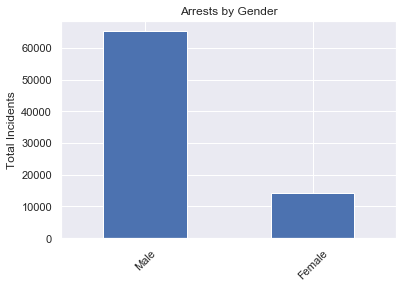

In [58]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
data_sex.plot(kind = 'bar')
plt.title('Arrests by Gender')
plt.ylabel('Total Incidents')
plt.xticks(range(2), ('Male', 'Female'), rotation =45)

plt.show()


In [59]:
data_race = dfArrests.Race.value_counts()
data_race

B    66028
W    11237
U     1825
I      221
A      210
Name: Race, dtype: int64

### Bar plot distribution according to the race criteria
### Race B shows the highest number of  people involved in causing offenses/crimes or may be baltimore have higher number of Race 'B' people thats why it might show a bias

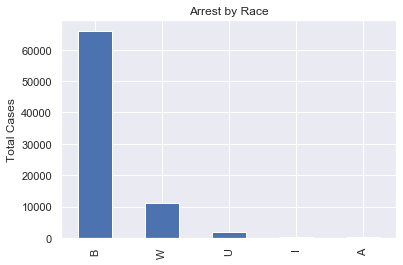

In [60]:
fig = plt.figure(figsize=(6,4))
data_race.plot(kind='bar')

plt.title('Arrest by Race')
plt.ylabel('Total Cases')
plt.show()

### To analyze offenses according to age group, we grouped ages and below Pie chart shows groups of ages according to the percentage



In [61]:
def age_bucket(x):
    if x <= 20 and x >= 0:
        return "less than 20"
    elif x <= 30  :
        return "between 20 and 30"
    elif x <= 40:
        return "between 30 and 40"
    elif x <= 50:
        return "between 40 and 50"
    elif x <= 60:
        return "between 50 and 60"    
    elif x > 60:
        return "60 and older "        
    else:
        return "Unknown"
    
data_ageGroup=  dfArrests.Age.map(lambda x: age_bucket(x)).value_counts()   
data_ageGroup

between 20 and 30    32717
between 30 and 40    17240
between 40 and 50    11345
less than 20         10107
between 50 and 60     6831
60 and older          1260
Unknown                 21
Name: Age, dtype: int64

### From the below plot we can say that nearly 50% of the crimes are committed by age group 20 to 30 and 2nd highest are between 30 to 40 .From this  we can conclued that young and middle age people are involved in offensive activities

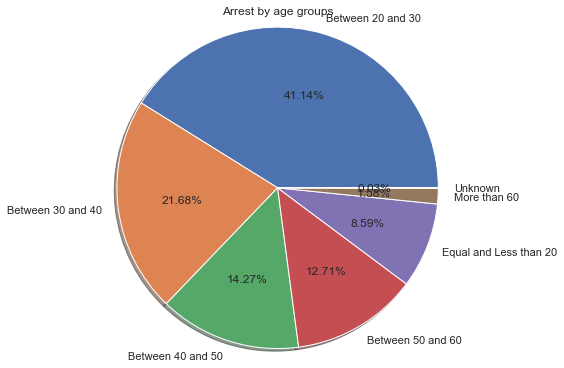

In [64]:
fig = plt.figure(figsize=(6,8))
#data_ageGroup.plot(kind='pie')
labels=('Between 20 and 30', 'Between 30 and 40', 'Between 40 and 50', 'Between 50 and 60', 'Equal and Less than 20', 'More than 60', 'Unknown')
plt.title('Arrest by age groups')
plt.pie(data_ageGroup,autopct='%1.2f%%',labels=labels, shadow = True,radius=1.2)

plt.show()

#### Bar  plot for the same as above

#### About 70% of the crimes are commited by age group 20-30

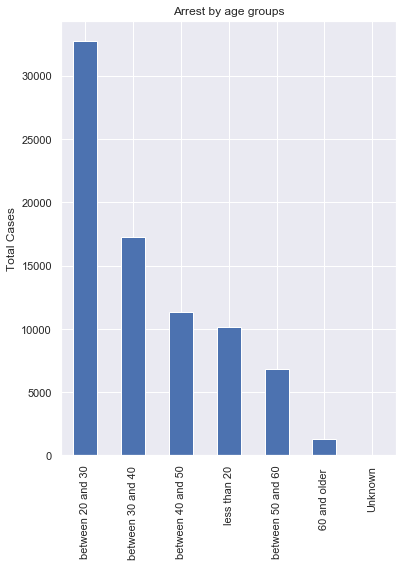

In [63]:
fig = plt.figure(figsize=(6,8))
data_ageGroup.plot(kind='bar')

plt.title('Arrest by age groups')
plt.ylabel('Total Cases')
#plt.xticks(range(2), ('Male', 'Female'), rotation =45)
plt.show()

#### Extracting data - Day Wise

In [65]:
data_Weekday= dfArrests['DayOfWeek'].value_counts()
data_Weekday

Wednesday    13248
Tuesday      13029
Thursday     13014
Friday       11886
Monday       10726
Saturday      9522
Sunday        8096
Name: DayOfWeek, dtype: int64

### Pie chart showing the %age of number of arrests each day. We can see that most of the arrests are on weekdays which can imply that since its weekday and the places in baltimore are not much crowded, its easy for criminals to attack people 

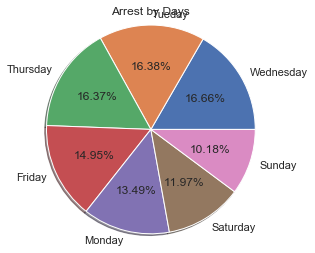

In [66]:
labelsweek=('Wednesday', 'Tueday', 'Thursday', 'Friday', 'Monday', 'Saturday', 'Sunday')
plt.title('Arrest by Days')
plt.pie(data_Weekday,autopct='%1.2f%%',labels=labelsweek, shadow = True,radius=1.2)

plt.show()

### Lets try to figure the arrests each year.

In [69]:
dfArrests['Year'].value_counts()

2014    22907
2015    14167
2016    12472
2017    11933
2018    10372
2019     7670
Name: Year, dtype: int64

### Below factor plot can say the Race "B" with male dominancy is more involved in offensive activities . Female count is way more less than than the Male count. Also the offenses and arrests are decreased since 2014 to till date

C:\Users\Aishwarya\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Aishwarya\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


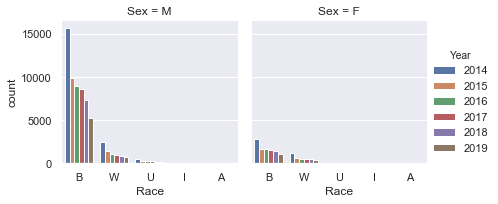

In [51]:
import seaborn as sns
%matplotlib inline
sns.set()
sns.factorplot(hue='Year', x='Race', col='Sex', data=dfArrests, kind='count',size=3 )

#### Below Factor flow has shown substantail decrease in female arrests than men in detail

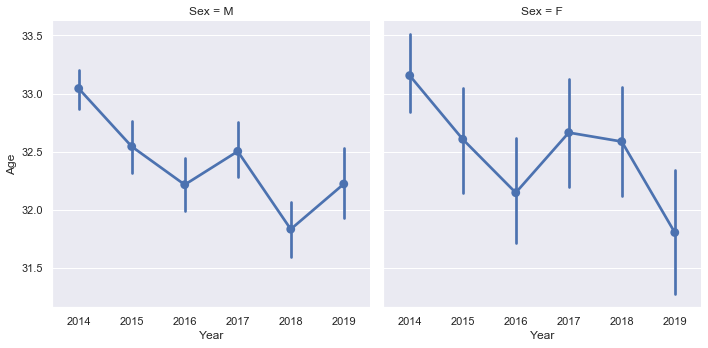

In [52]:
#dt = dfArrests[(dfArrests['Age']!=0) & (dfArrests['Age'].notnull()) ]
sns.factorplot(data=dfArrests, x="Year", col="Sex", y='Age')

### The arrests counts has been declined as shown in the plot ablove since 2014 to present 2019

Text(0, 0.5, 'count')

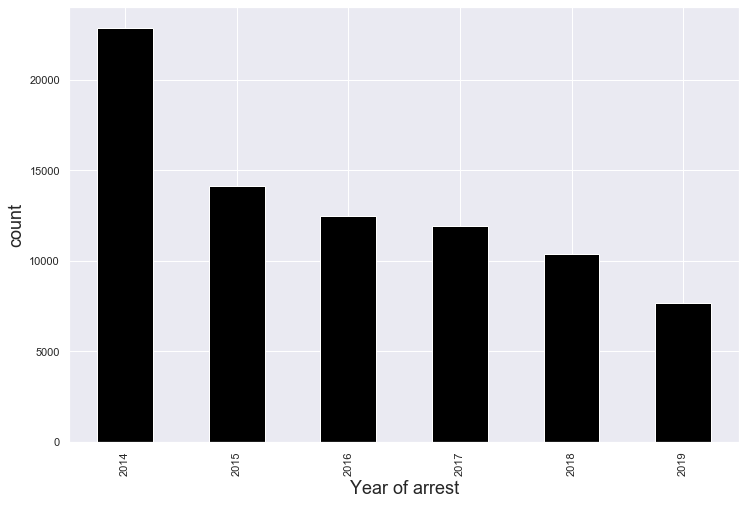

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
(dfArrests['ArrestDate']
.groupby(dfArrests.ArrestDate.dt.year)
.agg('count')
.plot.bar(stacked=True, color='black')
)
plt.xlabel('Year of arrest', fontsize=18)
plt.ylabel('count', fontsize=18)

### From the below hourly plot we can say that more offenses happen in afternoon and evening which seems to be quite opposite to what was expected!! As we think the incidents happen more at late night

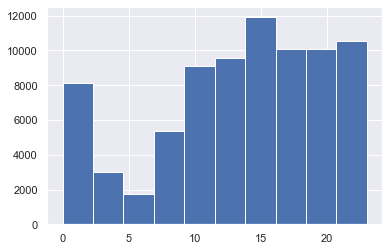

In [54]:
#dfArrests['Hour'] = dfArrests['ArrestTime'].apply(lambda x: x.hour)
dfArrests['ArrestTime']= pd.to_datetime(dfArrests['ArrestTime'])
dfArrests['Hour'] = dfArrests['ArrestTime'].dt.hour
dfArrests['Minute'] = dfArrests['ArrestTime'].dt.minute
dfArrests.Hour.hist()

### Considering only the valid districts in the dataset and counting each

In [ ]:
#print('number of diffenrent districts: ', dfArrests.District.value_counts().shape[0])
#print('number of NaN: ', dfArrests.District.isnull().sum())

#dfArrests.District.value_counts().sort_values(ascending=True).plot(kind='bar', rot=45)
#dfArrests.drop[dfArrests.District == '0']
#df_NotNeededDistricts = dfArrests[dfArrests.District != 'Southern','Western','Eastern','Northern','NorthWestern','SouthWestern','Central','Northeastern','Southeastern']
import numpy as np
values='Southern','Western','Eastern','Northern','Northwest','Southwest','Central','Northeast','Southeast',' ' 

#pd.Index(np.where(dfArrests['District'].isin(values))[0])
df_NotNeededDistricts =pd.Index(np.where(~dfArrests['District'].isin(values))[0])
#dfArrests.drop(pd.Index(np.where(~dfArrests['District'].isin(values))[0]), inplace = True)
#dfArrests.District.value_counts()
dfArrests.drop(df_NotNeededDistricts, inplace = True)
dfArrests['District'].value_counts()

### Factor Plot showing substantial decrese in each district since 2014 to 2019.
### From the below plot we can infer that offenses have been decrease for each districts from 2014-19 but it seems that most offenses occur in Northern and Southwest districts

C:\Users\Aishwarya\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Aishwarya\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


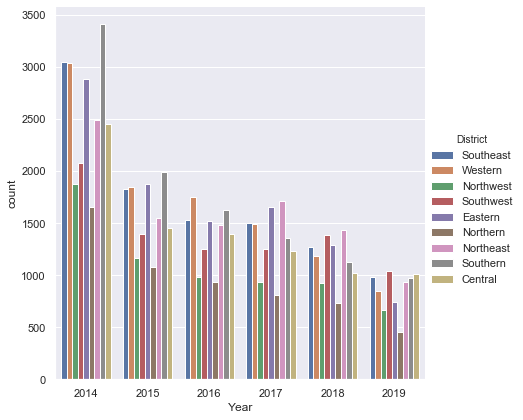

In [56]:
#data_district = dfArrests[dfArrests['District'].notnull()]
sns.factorplot(x='Year', hue='District', data=dfArrests, kind='count', size=6)

### AVERAGE arrests per year in terms months.

Year  Month  MonthDayNum
2014  1      1               85
             2               63
             3               55
             4               53
             5               28
             6               59
             7               61
             8               75
             9              113
             10              73
             11              53
             12              54
             13              84
             14              73
             15              68
             16              77
             17              87
             18              57
             19              49
             20              57
             21              43
             22              48
             23              79
             24              49
             25              70
             26              41
             27              62
             28              66
             29              67
             30              76
               

Text(0.5, 1.0, 'Average Arrests over the year')

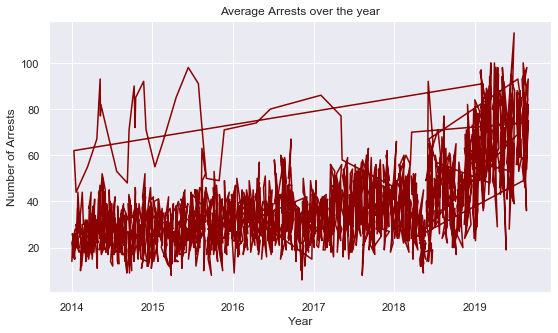

In [87]:
# Grouping the data by Year,Month and Day
arrests_day = dfArrests.groupby(['Year','Month','MonthDayNum'])['MonthDayNum'].count()
# Putting the count to Frame
print(arrests_day)
Count = arrests_day.to_frame(name='count').reset_index()
print(len(Count))
print(len(dfArrests.ArrestDate.unique()))
# Figure 
plt.figure(figsize=(9, 5))
plt.plot_date(dfArrests.ArrestDate.unique(), Count['count'], '-',color ='darkred')
plt.ylabel('Number of Arrests')
plt.xlabel('Year')
plt.title('Average Arrests over the year')

### We are prioritising the incidents with huge counts which are important as below (greater than 1500 count)

In [97]:
dfIncidentLimits =dfArrests['IncidentOffense'].value_counts()[dfArrests['IncidentOffense'].value_counts()>1500]

### By Categorising the type of incident we note that offense that involve narcotics ranks highest followed by offense which are unknown. From the we infer that people in Baltimore are more involved in drugs and committed offenses

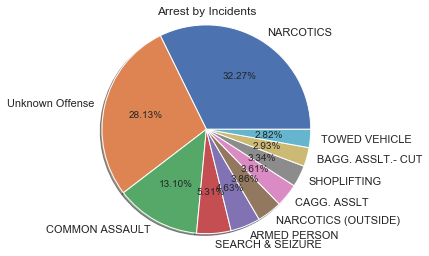

In [98]:

labelsweek=('NARCOTICS', 'Unknown Offense', 'COMMON ASSAULT', 'SEARCH & SEIZURE', 'ARMED PERSON', 'NARCOTICS (OUTSIDE)', 'CAGG. ASSLT','SHOPLIFTING','BAGG. ASSLT.- CUT','TOWED VEHICLE')
plt.title('Arrest by Incidents')
plt.pie(dfIncidentLimits,autopct='%1.2f%%',labels=labelsweek, shadow = True,radius=1.2)

plt.show()

### The above visualizations helped us understand and gain more insight of the datasets and now we proceed to put some models to predict

### Since our data doesnt have any labels we use unsupervised learning methods. we will use clustering algorithms
 ### we’ll focus on k-means first, which is a clustering algorithm. With k-means, a pre-determined number of clusters is given as input and the algorithm generates the clusters within the un-labeled dataset.

In [101]:
kmeans_1 = KMeans(n_clusters=10)
X = dfArrests[['Longitude','Latitude']].values
predictions = kmeans_1.fit_predict(X)

In [103]:
clustered = pd.concat([dfArrests.reset_index(), 
                       pd.DataFrame({'Cluster':predictions})], 
                      axis=1)

In [104]:
conditions = [
    clustered['Cluster'] == 0, 
    clustered['Cluster'] == 1,
    clustered['Cluster'] == 2,
    clustered['Cluster'] == 3,
    clustered['Cluster'] == 4,
    clustered['Cluster'] == 5,
    clustered['Cluster'] == 6,
    clustered['Cluster'] == 7,
    clustered['Cluster'] == 8,
    clustered['Cluster'] == 9 ]
choices = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday', 
           'Sunday', 'Monday', 'Tuesday', 'Wednesday' ]
clustered['DayOfWeek'] = np.select(conditions, choices, default='black')

In [105]:
clustered.sort_values(by=['Cluster'])

,index,Arrest,Age,Sex,Race,ArrestDate,ArrestTime,ArrestLocation,IncidentOffense,IncidentLocation,...,BPA_LongMatch,DayofWeeknumber,DayOfWeek,MonthDayNum,Month,Year,Hour,Minute,geometry,Cluster
29382,64447,16161938.0,54.0,M,B,2016-11-15,2019-12-18 15:30:00,1200 CLENDENIN ST,87NARCOTICS,1200 CLENDENIN ST,...,False,1,Monday,15,11,2016,15,30,POINT (-76.63808 39.31096),0
8684,22519,18150885.0,38.0,M,W,2018-10-04,2019-12-18 07:30:00,4000 FALLS RD,6JLARCENY- OTHER,4000 FALLS RD,...,False,3,Monday,4,10,2018,7,30,POINT (-76.63721 39.33736),0
52600,108476,15040012.0,47.0,F,B,2015-03-15,2019-12-18 15:00:00,1600 NORTH AVE,87NARCOTICS,1600 NORTH AVE,...,False,6,Monday,15,3,2015,15,0,POINT (-76.64340 39.31006),0
52599,108473,15038853.0,49.0,M,B,2015-03-12,2019-12-18 17:30:00,1800 PENNSYLVANIA AVE,87ONARCOTICS (OUTSIDE),1800 PENNSYLVANIA AVE,...,False,3,Monday,12,3,2015,17,30,POINT (-76.63564 39.30430),0
52597,108470,15035160.0,36.0,M,B,2015-03-07,2019-12-18 07:44:00,1800 PENNSYLVANIA AVE,87NARCOTICS,1800 PENNSYLVANIA AVE,...,False,5,Monday,7,3,2015,7,44,POINT (-76.63564 39.30430),0
52593,108466,15034541.0,57.0,F,B,2015-03-04,2019-12-18 14:15:00,1700 MOUNT ST,87NARCOTICS,1700 MOUNT ST,...,False,2,Monday,4,3,2015,14,15,POINT (-76.64491 39.30797),0
52582,108439,15034550.0,46.0,M,B,2015-03-04,2019-12-18 15:20:00,2100 MONROE ST,87NARCOTICS,2100 MONROE ST,...,False,2,Monday,4,3,2015,15,20,POINT (-76.64835 39.31237),0
31326,68249,16141796.0,49.0,M,B,2016-10-04,2019-12-18 11:13:00,600 CUMBERLAND ST,87NARCOTICS,600 CUMBERLAND ST,...,False,1,Monday,4,10,2016,11,13,POINT (-76.64217 39.30897),0
52575,108426,15034892.0,51.0,M,B,2015-03-06,2019-12-18 11:20:00,1600 WESTWOOD AVE,87NARCOTICS,1600 WESTWOOD AVE,...,False,4,Monday,6,3,2015,11,20,POINT (-76.64363 39.30948),0
52567,108413,15039923.0,21.0,M,B,2015-03-15,2019-12-18 00:30:00,4000 ROLAND AVE,3GFROBB CONV STORE-FIREARM,4000 ROLAND AVE,...,False,6,Monday,15,3,2015,0,30,POINT (-76.63319 39.33758),0


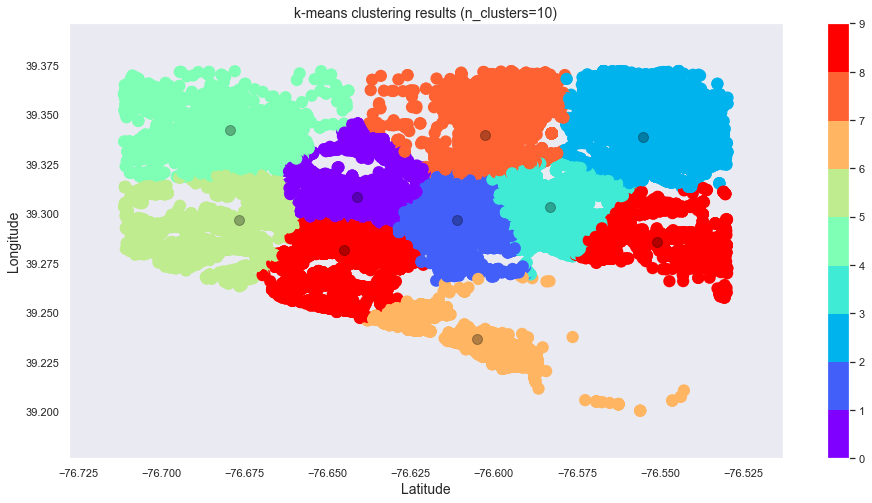

In [106]:

fig = plt.figure(figsize=(16,8))
cmap=plt.cm.rainbow
norm = matplotlib.colors.BoundaryNorm(np.arange(0,10,1), cmap.N)
plt.scatter(clustered['Longitude'], clustered['Latitude'], c=clustered['Cluster'],
            cmap=cmap, norm=norm, s=150, edgecolor='none')
plt.colorbar(ticks=np.linspace(0,9,10))
centers = kmeans_1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.3);
#plt.xlim(2.28, 2.375)
#plt.ylim(48.84, 48.89)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Longitude', fontsize=14)
plt.title('k-means clustering results (n_clusters=10)', fontsize=14)
plt.grid()
plt.show()



### HDBSCAN algorithms are density-based spatial clustering method that group together points that are close to each other based on a distance measurement and a minimum number of points. It also marks as outliers the points that are in low-density regions

### Since the k-means algorithm is on euclidenan distance and dint fit properly for Geo data we tried using DBScan 

In [107]:
import hdbscan

In [108]:
rads = np.radians(X)
clusterer = hdbscan.HDBSCAN(min_cluster_size=2, metric='haversine')
predictions = clusterer.fit_predict(rads)

In [109]:
clustered = pd.concat([dfArrests.reset_index(), 
                       pd.DataFrame({'Cluster':predictions})], 
                      axis=1)
clustered.drop('index', axis=1, inplace=True)
conditions = [
    clustered['Cluster'] == -1, 
    clustered['Cluster'] == 0,
    clustered['Cluster'] == 1,
    clustered['Cluster'] == 2,
    clustered['Cluster'] == 3,
    clustered['Cluster'] == 4,
    clustered['Cluster'] == 5,
    clustered['Cluster'] == 6,
    clustered['Cluster'] == 7,
    clustered['Cluster'] == 8 ]
choices = ['NA/Noise', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 
           'Friday','Saturday', 'Sunday', 'Monday', 'Tuesday' ]
clustered['Vacation Day'] = np.select(conditions, choices, default='black')
clustered.sort_values(by=['Cluster'])

,Arrest,Age,Sex,Race,ArrestDate,ArrestTime,ArrestLocation,IncidentOffense,IncidentLocation,Charge,...,DayofWeeknumber,DayOfWeek,MonthDayNum,Month,Year,Hour,Minute,geometry,Cluster,Vacation Day
17532,17184856.0,31.0,M,B,2017-11-24,2019-12-18 01:00:00,0 N. EDEN ST,5EBURG. OTH. (ATT.),0 N. EDEN ST,1 1111,...,4,Friday,24,11,2017,1,0,POINT (-76.59886 39.29383),-1,NA/Noise
71445,14051025.0,23.0,M,B,2014-04-02,2019-12-18 13:20:00,2500 FAIRMOUNT ST,24TOWED VEHICLE,2500 FAIRMOUNT ST,4 3550,...,2,Wednesday,2,4,2014,13,20,POINT (-76.58148 39.29317),-1,NA/Noise
29702,16166550.0,39.0,M,B,2016-11-27,2019-12-18 22:00:00,4200 MARY AVE,4ECOMMON ASSAULT,4200 MARY AVE,1 1415,...,6,Sunday,27,11,2016,22,0,POINT (-76.54178 39.34396),-1,NA/Noise
50932,15052497.0,21.0,M,B,2015-04-04,2019-12-18 16:30:00,4700 HELLWIG AVE,4CAGG. ASSLT.- OTH.,4700 HELLWIG AVE,1 1415,...,5,Saturday,4,4,2015,16,30,POINT (-76.53422 39.34434),-1,NA/Noise
10913,18113322.0,30.0,M,B,2018-07-23,2019-12-18 02:25:00,2700 THE ALAMEDA ST,4ECOMMON ASSAULT,2700 THE ALAMEDA ST,1 1415,...,0,Monday,23,7,2018,2,25,POINT (-76.59124 39.32185),-1,NA/Noise
2358,19043841.0,18.0,M,B,2019-03-25,2019-12-18 21:25:00,2600 BOARMAN AVE,54ARMED PERSON,2600 BOARMAN AVE,1 5285,...,0,Monday,25,3,2019,21,25,POINT (-76.66466 39.33969),-1,NA/Noise
2359,19058117.0,43.0,M,B,2019-04-19,2019-12-18 13:00:00,200 PRESTRON ST,6DLARCENY- FROM AUTO,200 PRESTRON ST,1 1137,...,4,Friday,19,4,2019,13,0,POINT (-76.61332 39.30464),-1,NA/Noise
2360,19052056.0,38.0,F,B,2019-04-09,2019-12-18 00:15:00,6000 WAKEHURST WAY,6DLARCENY- FROM AUTO,6000 WAKEHURST WAY,3 4030,...,1,Tuesday,9,4,2019,0,15,POINT (-76.58564 39.36431),-1,NA/Noise
38086,16038126.0,46.0,M,B,2016-03-15,2019-12-18 19:20:00,2400 WOODBROOK AVE,87VNARCOTICS (ONVIEW),2400 WOODBROOK AVE,2 2210,...,1,Tuesday,15,3,2016,19,20,POINT (-76.64176 39.31093),-1,NA/Noise
44406,15149258.0,29.0,F,B,2015-10-03,2019-12-18 16:45:00,5200 LINDEN HEIGHTS AVE,4BAGG. ASSLT.- CUT,5200 LINDEN HEIGHTS AVE,1 1420,...,5,Saturday,3,10,2015,16,45,POINT (-76.68414 39.34439),-1,NA/Noise


### We see that the centre of the map is dense with the days when arrests occured such as Monday and Wednesday  

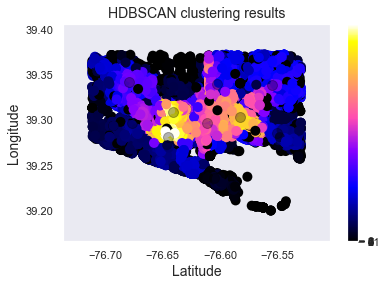

In [110]:
cmap=plt.cm.gnuplot2
#norm = matplotlib.colors.BoundaryNorm(np.arange(0,10,1), cmap.N)
plt.scatter(clustered['Longitude'], clustered['Latitude'], c=clustered['Cluster'],
            cmap=cmap, s=100, edgecolor='none')
plt.colorbar(ticks=[-1,0,1,2,3,4,5,6,7,8])
centers = kmeans_1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.3);
#plt.xlim(2.28, 2.375)
#plt.ylim(48.84, 48.89)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Longitude', fontsize=14)
plt.title('HDBSCAN clustering results', fontsize=14)
plt.grid()
plt.show()

## Geopandas to plot the geographical plots

#### we installed shapely,geopandas and descartes to plot the geo-visualizations. Downloaded the baltimore shp file to get the baltimore street data since our data is for Baltimore 

In [70]:
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon
%matplotlib inline

In [71]:
street_map = gpd.read_file('Downloads/StreetMap2000.shp/StreetMap2000.shp')

In [72]:
new_map = gpd.read_file('Downloads/tl_2014_24_cousub/tl_2014_24_cousub.shp')

In [73]:
yet_map=gpd.read_file('Downloads/CCTV_Cameras/geo_export_b9919286-012e-431d-a8f4-57b6eb1f4ce3.shp')

### Below is the street map of Baltimore

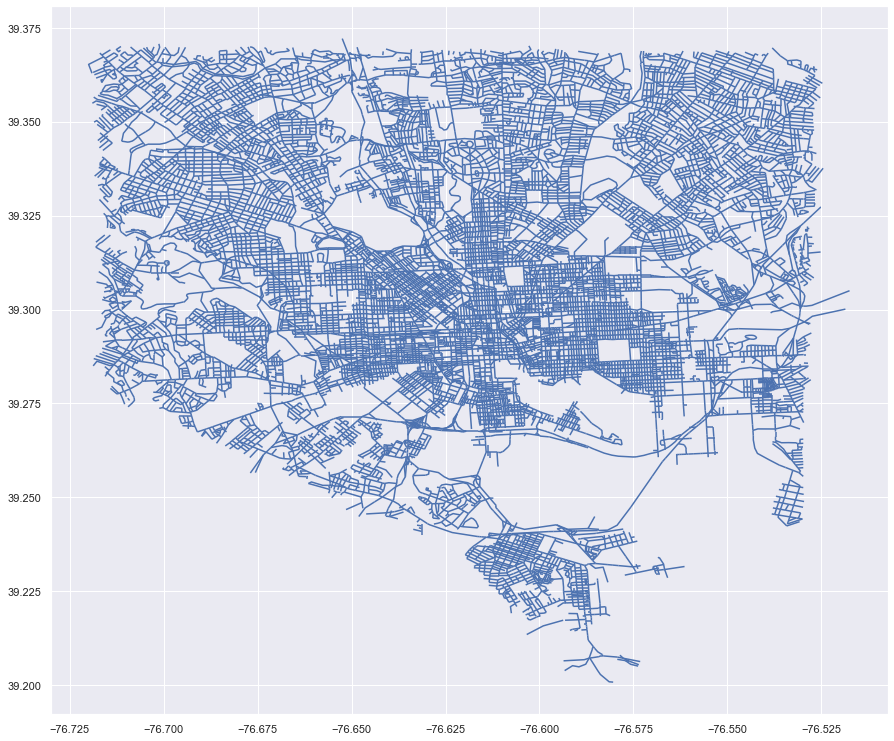

In [74]:
fig, ax = plt.subplots(figsize =(15,15))
street_map.plot(ax=ax)

In [76]:
crs={'init':'epsg:3582'}
dfArrests.head()

,Arrest,Age,Sex,Race,ArrestDate,ArrestTime,ArrestLocation,IncidentOffense,IncidentLocation,Charge,...,OrgLongitude,BPA_LatMatch,BPA_LongMatch,DayofWeeknumber,DayOfWeek,MonthDayNum,Month,Year,Hour,Minute
1,19029683.0,36.0,M,B,2019-02-27,2019-12-18 12:10:00,200 EDEN ST,Unknown Offense,200 EDEN ST,1 1111,...,-76.598568971120,False,False,2,Wednesday,27,2,2019,12,10
65,18179504.0,27.0,M,B,2018-11-30,2019-12-18 18:00:00,1700 BAKER ST,54ARMED PERSON,1700 BAKER ST,1 1455,...,-76.644865602991,False,False,4,Friday,30,11,2018,18,0
73,19043854.0,39.0,M,W,2019-03-25,2019-12-18 22:00:00,6300 BROWN ST,3BROBB HIGHWAY (UA),6300 BROWN ST,1 1415,...,-76.53778800000,False,False,0,Monday,25,3,2019,22,0
87,19088544.0,17.0,M,B,2019-06-17,2019-12-18 21:00:00,3200 AVONDALE AVE,Unknown Offense,3200 AVONDALE AVE,1 1455,...,-76.67831300000,False,False,0,Monday,17,6,2019,21,0
90,19082409.0,40.0,M,B,2019-06-05,2019-12-18 20:15:00,900 MT HOLLY ST,26RECOVERED VEHICLE,900 MT HOLLY ST,2 0480,...,-76.68003600000,False,False,2,Wednesday,5,6,2019,20,15


In [78]:
#arrests_latt = dfArrests['Latitude']<39.05.astype(float)
geometry = [Point(xy) for xy in zip(dfArrests["Longitude"],dfArrests["Latitude"])]
geometry[:3]

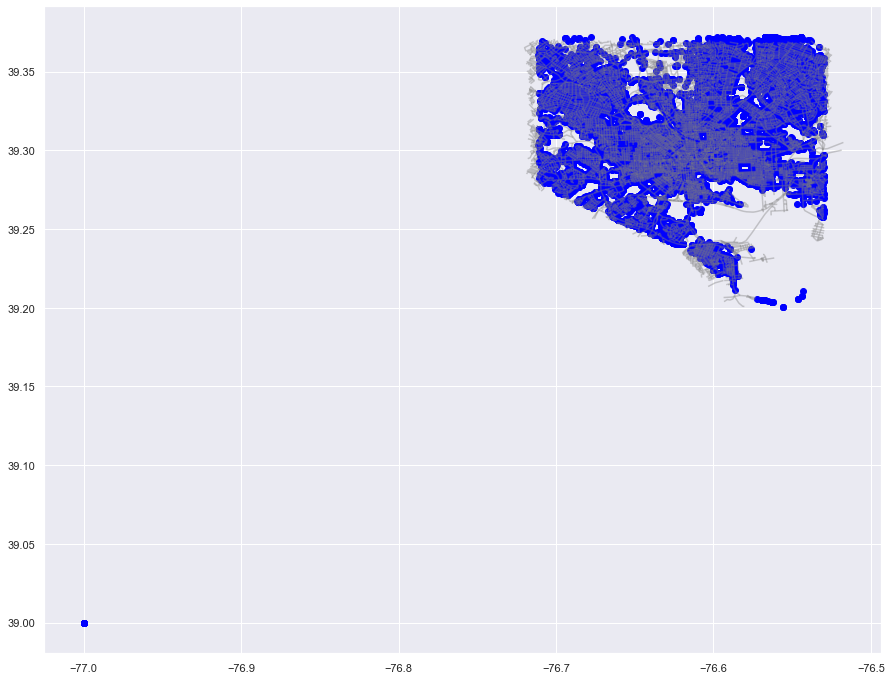

In [79]:
geo_df=gpd.GeoDataFrame(dfArrests,crs={'init':'epsg:102605'},geometry=geometry)
#geo_df.head()
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax,alpha =0.4,color="grey")
#minx, miny, maxx, maxy = geo_df.total_bounds
#ax.set_xlim(minx, maxx)
#ax.set_ylim(miny, maxy)
geo_df.plot(ax=ax,color="blue")

### AS we see in the above graph, we can find some few outliers in the Lattitude and Longitude. So we limit the lattitude less than 39.05 to avoid those outliers  by dropping those rows which and quite few and to expand our graph a bit to get the clearer view of the  data

In [80]:
dfArrests[dfArrests['Latitude']<39.05]

,Arrest,Age,Sex,Race,ArrestDate,ArrestTime,ArrestLocation,IncidentOffense,IncidentLocation,Charge,...,BPA_LatMatch,BPA_LongMatch,DayofWeeknumber,DayOfWeek,MonthDayNum,Month,Year,Hour,Minute,geometry
10445,19129817.0,67.0,M,B,2019-09-08,2019-12-18 15:52:00,1400 LAKEWOOD AVE,4BAGG. ASSLT.- CUT,1400 LAKEWOOD AVE,1 1420,...,False,False,6,Sunday,8,9,2019,15,52,POINT (-77.00000 39.00000)
10446,19131846.0,20.0,M,B,2019-09-11,2019-12-18 19:00:00,200 29TH ST,3AJFROBB CARJACK-FIREARM,200 29TH ST,1 0826,...,False,False,2,Wednesday,11,9,2019,19,0,POINT (-77.00000 39.00000)
10447,19142041.0,49.0,M,B,2019-10-01,2019-12-18 19:35:00,1600 CALHOUN ST,Unknown Offense,1600 CALHOUN ST,1 1119,...,False,False,1,Tuesday,1,10,2019,19,35,POINT (-77.00000 39.00000)
10448,19142839.0,35.0,M,B,2019-10-03,2019-12-18 04:00:00,500 ALLENDALE ST,4ECOMMON ASSAULT,500 ALLENDALE ST,1 1415,...,False,False,3,Thursday,3,10,2019,4,0,POINT (-77.00000 39.00000)
10450,19148610.0,29.0,M,B,2019-10-15,2019-12-18 22:09:00,1900 LOMBARD ST,Unknown Offense,1900 LOMBARD ST,1 1564,...,False,False,1,Tuesday,15,10,2019,22,9,POINT (-77.00000 39.00000)
10451,19144102.0,22.0,M,B,2019-10-06,2019-12-18 17:30:00,4500 PARKWOOD AVE,Unknown Offense,4500 PARKWOOD AVE,NaN,...,False,False,6,Sunday,6,10,2019,17,30,POINT (-77.00000 39.00000)
10452,19140413.0,24.0,M,W,2019-09-28,2019-12-18 16:00:00,20 LIGHT ST,Unknown Offense,20 LIGHT ST,1 1415,...,False,False,5,Saturday,28,9,2019,16,0,POINT (-77.00000 39.00000)
10454,19143839.0,34.0,F,B,2019-10-04,2019-12-18 18:17:00,2000 SARATOGA ST,4CAGG. ASSLT.- OTH.,2000 SARATOGA ST,1 1415,...,False,False,4,Friday,4,10,2019,18,17,POINT (-77.00000 39.00000)
10456,19132112.0,33.0,M,B,2019-09-12,2019-12-18 08:02:00,2400 BELVEDERE AVE,6DLARCENY- FROM AUTO,2400 BELVEDERE AVE,1 1111,...,False,False,3,Thursday,12,9,2019,8,2,POINT (-77.00000 39.00000)
10459,19153539.0,30.0,M,B,2019-10-25,2019-12-18 14:10:00,1200 OAKHURST PL,Unknown Offense,1200 OAKHURST PL,1 1119,...,False,False,4,Friday,25,10,2019,14,10,POINT (-77.00000 39.00000)


#### Droping the rows of latitude with value less than 39.05 to discard outliers in the map and to show it efficiently
 

In [81]:

dfArrests.drop(dfArrests[dfArrests.Latitude < 39.05].index, inplace=True)

In [82]:
dfArrests[dfArrests['Latitude']<39.05]

,Arrest,Age,Sex,Race,ArrestDate,ArrestTime,ArrestLocation,IncidentOffense,IncidentLocation,Charge,...,BPA_LatMatch,BPA_LongMatch,DayofWeeknumber,DayOfWeek,MonthDayNum,Month,Year,Hour,Minute,geometry


In [83]:

#dfArrests['Longitude']=pd.to_numeric(dfArrests['Longitude'], downcast='float')
#dfArrests['Latitude']=pd.to_numeric(dfArrests['Latitude'], downcast='float')

#arrests_long = dfArrests[(dfArrests['Longitude'] != ' ')]
#arrests_latt = dfArrests[(dfArrests['Latitude'] != ' ')]
#arrests_long = dfArrests['Longitude']
#arrests_latt = dfArrests['Latitude']<39.05.astype(float)
geometry = [Point(xy) for xy in zip(dfArrests["Longitude"],dfArrests["Latitude"])]
geometry[:3]

### The blue points in below geo plot  indicates the location of arrests and offenses occured. It seems like central part of the city is more vulnerable to such incidents than the outskirts because points are overlapping and dense towards the centre

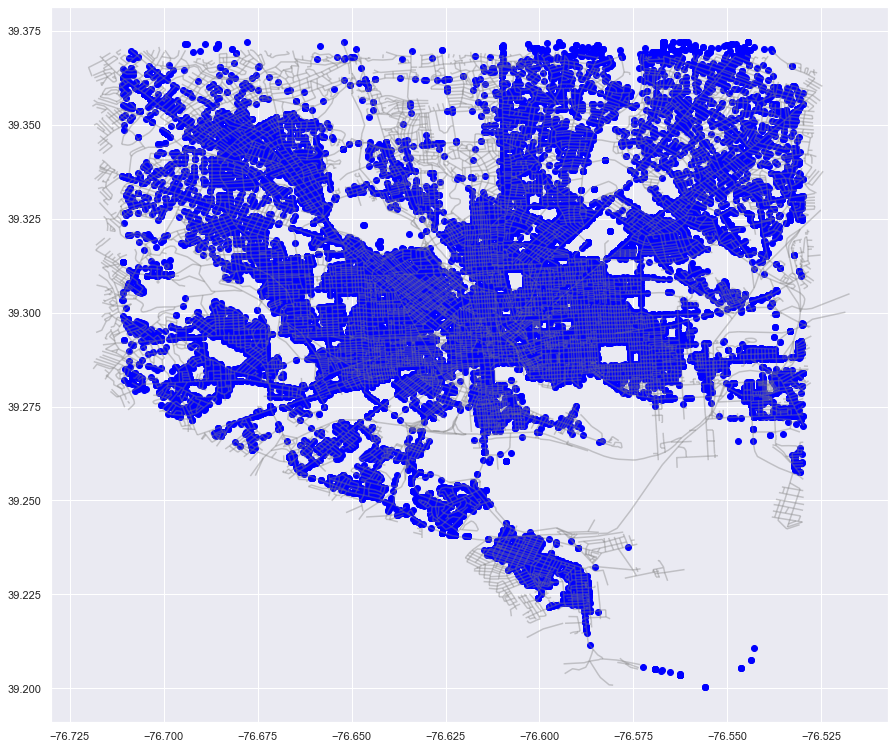

In [84]:
geo_df=gpd.GeoDataFrame(dfArrests,crs={'init':'epsg:102605'},geometry=geometry)
#geo_df.head()
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax,alpha =0.4,color="grey")
#minx, miny, maxx, maxy = geo_df.total_bounds
#ax.set_xlim(minx, maxx)
#ax.set_ylim(miny, maxy)
geo_df.plot(ax=ax,color="blue")

### We also tried scatter plot to see how it looks before using geopandas

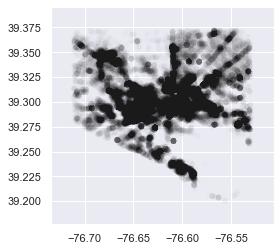

In [85]:
plt.figure(figsize=(4,4))
plt.scatter(dfArrests.Longitude, dfArrests.Latitude, alpha=0.01, edgecolor='none', c='k')



### The points in red represent the camera location in baltimore city. According to the recent dataset it looks most of the CCTV are located at the heart of the city

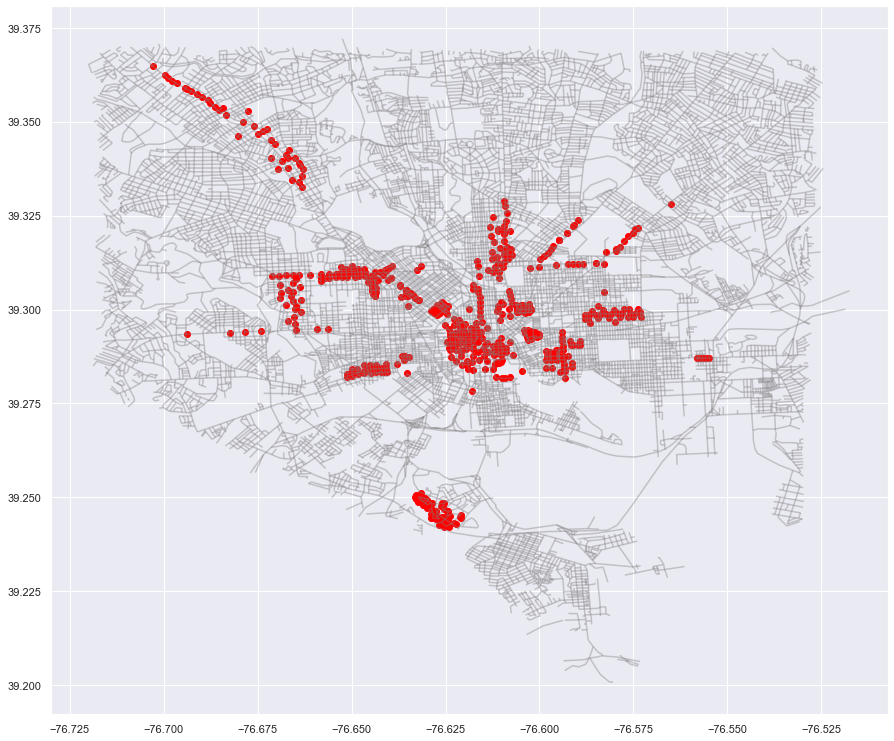

In [89]:
geometrycctv = [Point(xy) for xy in zip(dfCCTV["Longitude"],dfCCTV["Latitude"])]
geometrycctv[:3]
geo_dfcctv=gpd.GeoDataFrame(dfCCTV,crs={'init':'epsg:102605'},geometry=geometrycctv)
geo_dfcctv.head()

fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax,alpha =0.4,color="grey")
#minx, miny, maxx, maxy = geo_df.total_bounds
#ax.set_xlim(minx, maxx)
#ax.set_ylim(miny, maxy)
geo_dfcctv.plot(ax=ax,color="red")

### By Merging both offense locations(Blue Points) and CCTV (Red Points) we have below geo plot which suggests that more CCTV camera's are needed to cover the arrests/offenses.
### we also see that the CCTV are not enough in the outer regions of baltimore and hence its difficult to capture incidents

<Figure size 432x288 with 0 Axes>

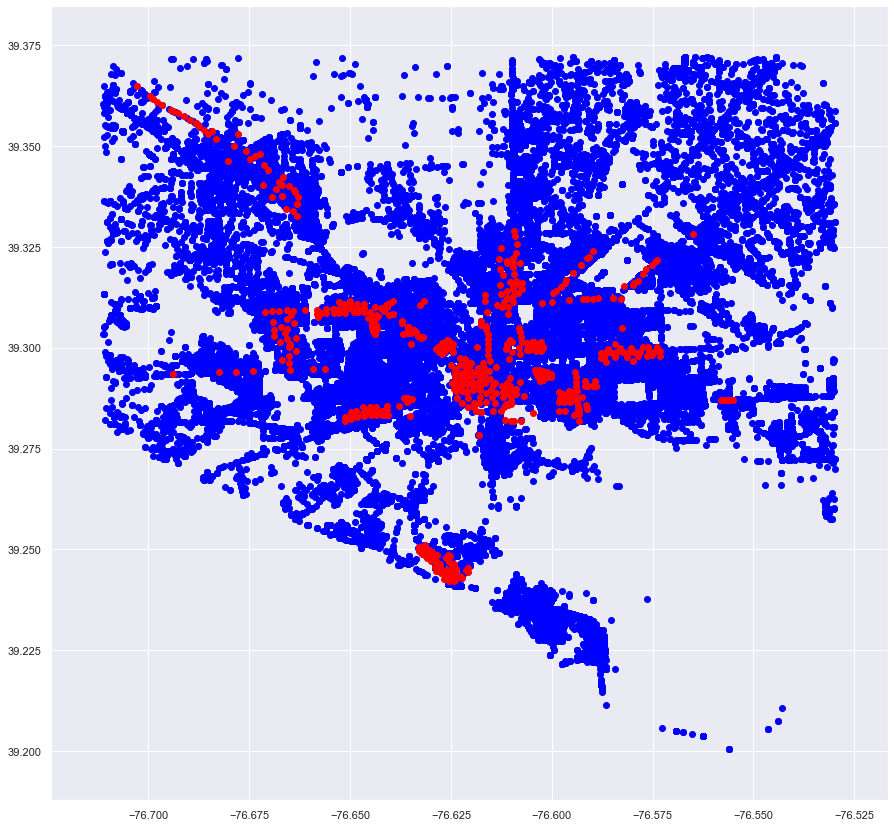

In [90]:

geo_df=gpd.GeoDataFrame(dfArrests,crs={'init':'epsg:102605'},geometry=geometry)
geo_dfcctv=gpd.GeoDataFrame(dfCCTV,crs={'init':'epsg:102605'},geometry=geometrycctv)
#geometrycctv = [Point(xy) for xy in zip(dfCCTV["Longitude"],dfCCTV["Latitude"])]
street_map.plot(ax=ax,alpha =0.4,color="grey")
fig, ax = plt.subplots(figsize=(15,15))
geo_df.plot(ax=ax,color="blue")
geo_dfcctv.plot(ax=ax,color="red")

### The workflow above involved fetching and preparing data for visualizations and geographic aggregaton of data, enrichment using demograhic variable and clustering using scikit learn. From all the above analysis and statistics we see that cameras play a vital role in detecting offenses. Although regions without cameras have reported offense, it suggests that there may be more offense which remain unreported. 

#### Future Scope 

One of the future scope of this project could be to use the CCTV Locations Obsolete dataset to analyse why those CCTV cameras were removed. 

A predictive model which predicts how many crimes will be reported on a particular day and time. 

### Target Customers/ Why this would be of use

Baltimore being ranked among the top 3 states with high crime rate and living in this city, this would help reduce the crime rate. It will not only predict the crime but to analyze which type of offense is more and which districts/ areas are more prone to offenses. 